In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\HP\MachineLearning\Machine_Learning_Project_HR-Attrition_data-main\HR_Employee_Attrition-1.csv")
data.head().T

,0,1,2,3,4
EmployeeNumber,1,2,3,4,5
Attrition,Yes,No,Yes,No,No
Age,41,49,37,33,27
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1


In [3]:
data.columns

Index(['EmployeeNumber', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
data.shape

(2940, 35)

In [5]:
data.isnull().sum()

EmployeeNumber              0
Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
data.nunique()

EmployeeNumber              2940
Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [7]:
include =['object', 'float', 'int']
data.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeNumber,2940.0,1470.500000,848.849221,1.0,735.75,1470.5,2205.25,2940.0
Age,2940.0,36.923810,9.133819,18.0,30.00,36.0,43.00,60.0
DailyRate,2940.0,802.485714,403.440447,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.00,7.0,14.00,29.0
Education,2940.0,2.912925,1.023991,1.0,2.00,3.0,4.00,5.0
EmployeeCount,2940.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EnvironmentSatisfaction,2940.0,2.721769,1.092896,1.0,2.00,3.0,4.00,4.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.00,66.0,84.00,100.0
JobInvolvement,2940.0,2.729932,0.711440,1.0,2.00,3.0,3.00,4.0
JobLevel,2940.0,2.063946,1.106752,1.0,1.00,2.0,3.00,5.0


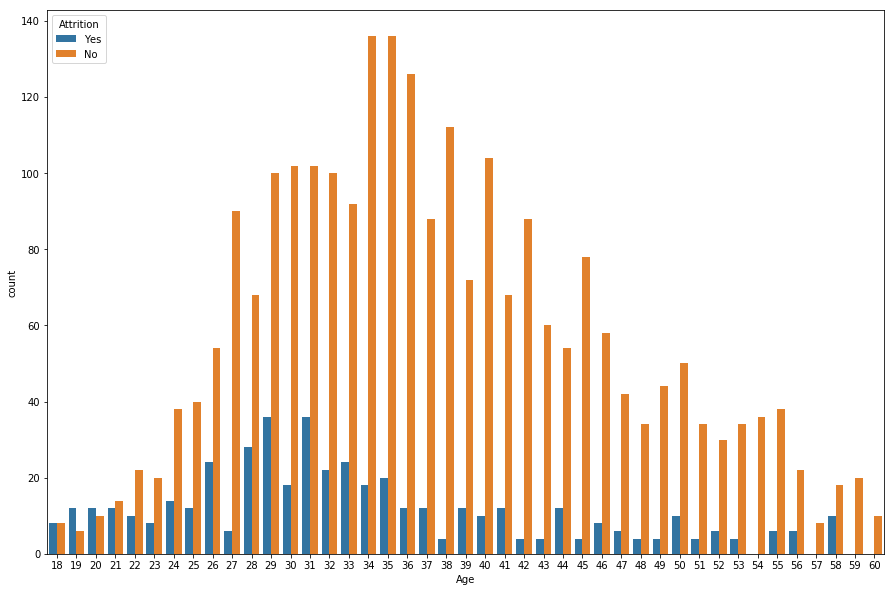

In [13]:
plt.subplots(figsize=(15,10))
sns.countplot(x=data['Age'],hue=data['Attrition'])

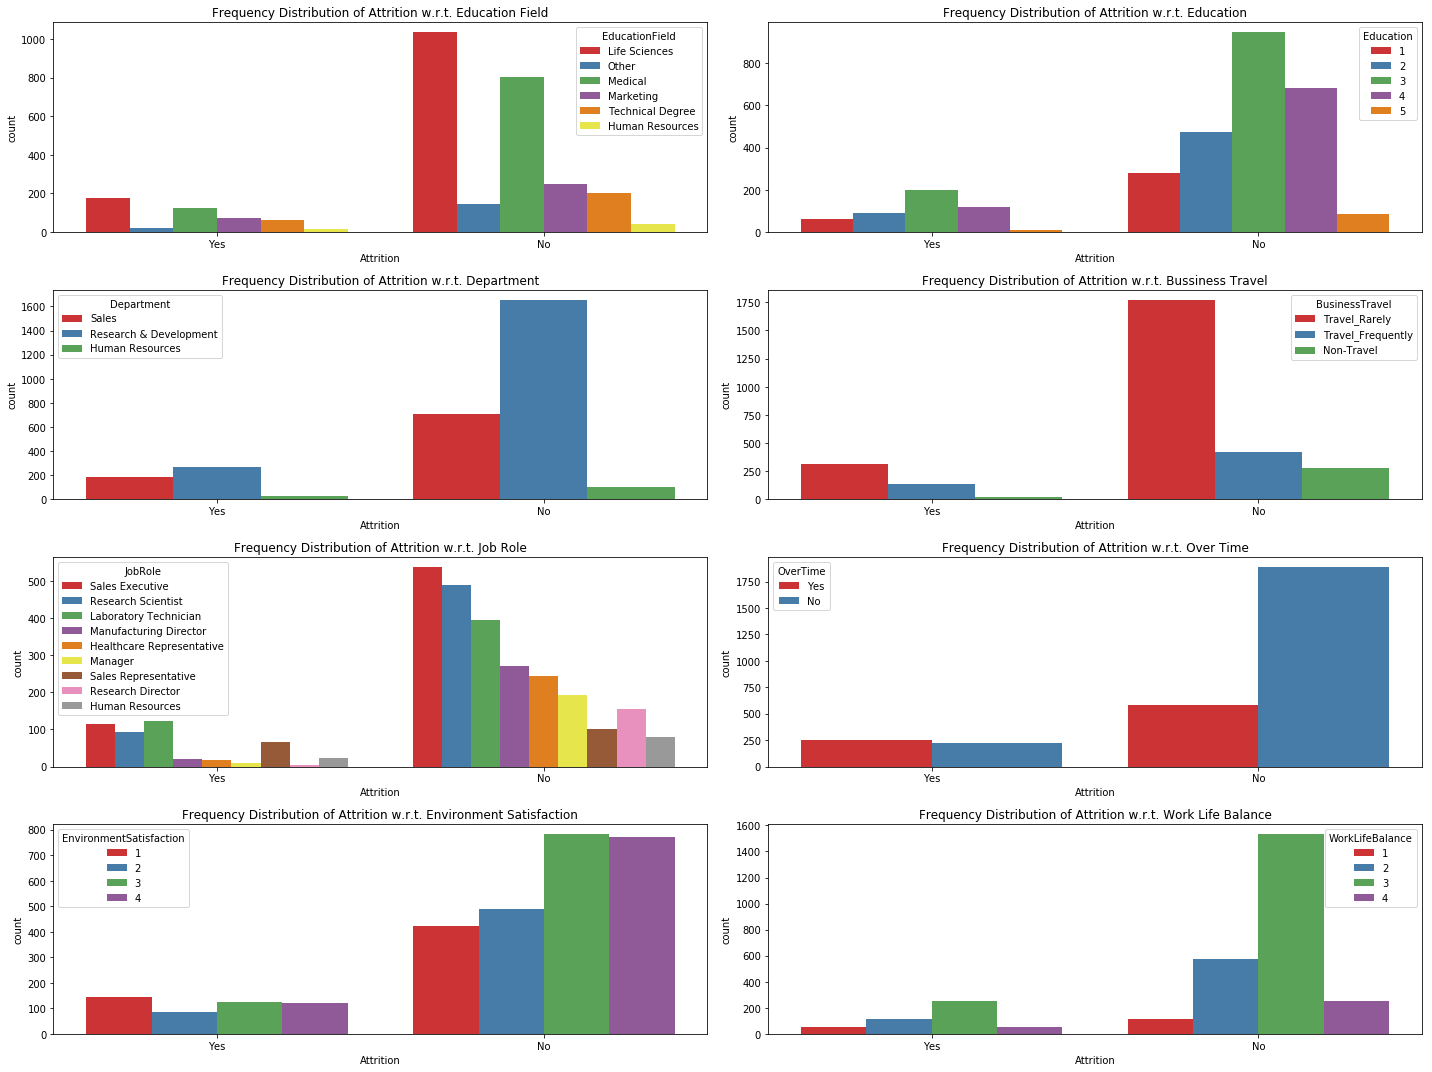

In [69]:
f, ax = plt.subplots(4,2, figsize=(20,15))

ax[0,0] = sns.countplot(x='Attrition', hue= 'EducationField', data=data, ax = ax[0,0], palette='Set1' )
ax[0,0].set_title("Frequency Distribution of Attrition w.r.t. Education Field")

ax[1,0] = sns.countplot(x='Attrition', hue= 'Department', data=data,  ax = ax[1,0], palette='Set1' )
ax[1,0].set_title("Frequency Distribution of Attrition w.r.t. Department")

ax[0,1] = sns.countplot(x='Attrition', hue= 'Education', data=data,  ax = ax[0,1], palette='Set1' )
ax[0,1].set_title("Frequency Distribution of Attrition w.r.t. Education")

ax[1,1] = sns.countplot(x='Attrition', hue= 'BusinessTravel', data=data,  ax = ax[1,1], palette='Set1' )
ax[1,1].set_title("Frequency Distribution of Attrition w.r.t. Bussiness Travel")

ax[2,0] = sns.countplot(x='Attrition', hue= 'JobRole', data=data, ax = ax[2,0], palette='Set1' )
ax[2,0].set_title("Frequency Distribution of Attrition w.r.t. Job Role")

ax[2,1] = sns.countplot(x='Attrition', hue= 'OverTime', data=data,  ax = ax[2,1],palette='Set1' )
ax[2,1].set_title("Frequency Distribution of Attrition w.r.t. Over Time")

ax[3,0] = sns.countplot(x='Attrition', hue= 'EnvironmentSatisfaction', data=data,  ax = ax[3,0],palette='Set1' )
ax[3,0].set_title("Frequency Distribution of Attrition w.r.t. Environment Satisfaction")

ax[3,1] = sns.countplot(x='Attrition', hue='WorkLifeBalance', data=data, ax = ax[3,1], palette='Set1')
ax[3,1].set_title("Frequency Distribution of Attrition w.r.t. Work Life Balance")

f.tight_layout()

In [44]:
for column in data.columns:
    if data[column].dtype==object:
        print (column)
        print ("-------")
        print (data[column].value_counts())
        print ("--------------------------------------")

Attrition
-------
No     2466
Yes     474
Name: Attrition, dtype: int64
--------------------------------------
BusinessTravel
-------
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64
--------------------------------------
Department
-------
Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64
--------------------------------------
EducationField
-------
Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64
--------------------------------------
Gender
-------
Male      1764
Female    1176
Name: Gender, dtype: int64
--------------------------------------
JobRole
-------
Sales Executive              652
Research Scientist           584
Laboratory Technician        518
Manufacturing Director       290
Healthcare Representative 

In [46]:
data = data.drop('Over18',axis=1)

In [54]:
data = data.drop('StandardHours',axis=1)

In [55]:
data = data.drop('EmployeeNumber',axis=1)

In [57]:
data = data.drop('EmployeeCount',axis=1)

In [58]:
data.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [62]:
corr = data.corr()

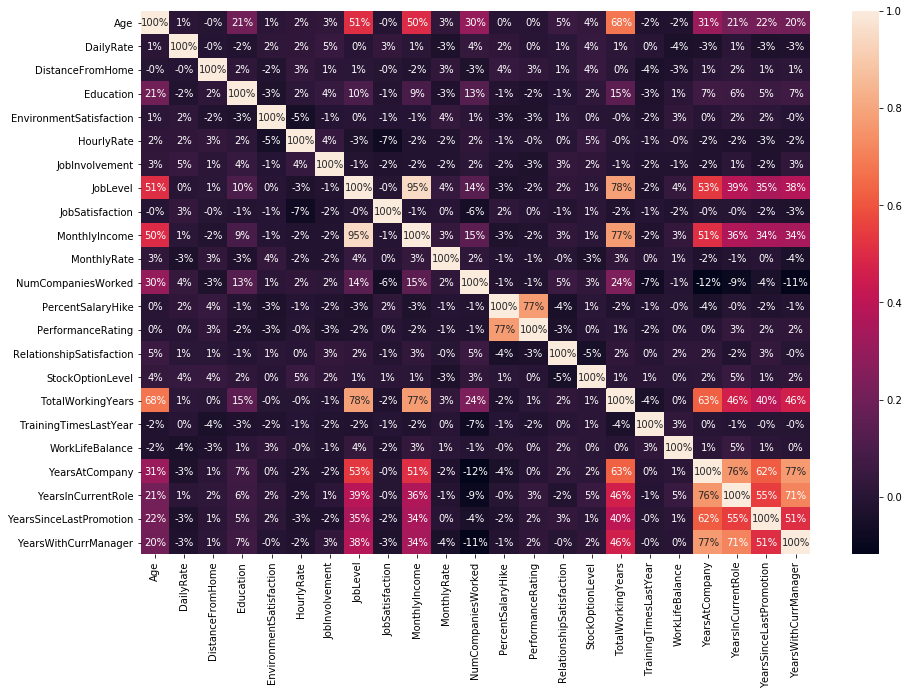

In [63]:
plt.subplots(figsize=(15,10))
sns.heatmap(corr,annot=True,fmt=".0%")

In [72]:
#Transform Categorical Features
for column in data.columns:
    if data[column].dtype==object:
        data[column]=LabelEncoder().fit_transform(data[column])
    else:
        continue

In [73]:
data.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,0,49,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,1,37,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,0,33,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,0,27,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [79]:
#Splitting Input and Output Features
Y = data['Attrition']
X = data

In [81]:
X=X.drop('Attrition',axis=1)

In [82]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2
5,32,1,1005,1,2,2,1,4,1,79,...,3,3,0,8,2,2,7,7,3,6
6,59,2,1324,1,3,3,3,3,0,81,...,4,1,3,12,3,2,1,0,0,0
7,30,2,1358,1,24,1,1,4,1,67,...,4,2,1,1,2,3,1,0,0,0
8,38,1,216,1,23,3,1,4,1,44,...,4,2,0,10,2,3,9,7,1,8
9,36,2,1299,1,27,3,3,3,1,94,...,3,2,2,17,3,2,7,7,7,7


In [83]:
#Splitting data for training and testing
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [85]:
#Building Random Forest Model
rf = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [86]:
rf.score(X_train,y_train)

0.9945578231292517

In [91]:
y_pred = rf.predict(X_test)

In [92]:
 accuracy_score(y_test,y_pred)

0.9537414965986395